In [35]:
import numpy as np
from evaluation import EvaluationMetrics
from dataloader import ImageDataset
from panet import PanNet
from panet import EncoderNet
import torch
from torch.utils.data import DataLoader
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [36]:
csv_path = "/Users/aniruddha/Downloads/DL_info.csv"
Image_slices_dir = "/Users/aniruddha/Downloads/Test"

df = pd.read_csv(csv_path)          # The DL_info.csv file path
df.sort_values("File_name", inplace=True) 
df.drop_duplicates(subset ="File_name", 
                     keep = False, inplace = True) 

new_df = df[df['Train_Val_Test']==3]

In [38]:
model = EncoderNet()
model.load_state_dict(torch.load('/Users/aniruddha/Downloads/panet_model_0.dms'))

In [59]:
dataset = ImageDataset(root_dir= '/Users/aniruddha/Downloads/Test', dataset_type= 3)
'''
batch_size = 3
dataloader = DataLoader(dataset=dataset, batch_size= batch_size)

'''

'\nbatch_size = 3\ndataloader = DataLoader(dataset=dataset, batch_size= batch_size)\n\n'

In [13]:
'''
bbox_global = None
bbox_pred_global = None

start = True
count = 0
for batch in dataloader:
    img = batch['image']
    bbox = batch['lesions']
    bbox_pred = model(img)
    count += 1
    if start:
        bbox_global = bbox
        bbox_pred_global = bbox_pred
        start = False
    else:
        bbox_global = torch.cat((bbox_global, bbox), dim = 0)
        bbox_pred_global = torch.cat((bbox_pred_global, bbox_pred), dim = 0)
    print(count)

'''

"\nbbox_global = None\nbbox_pred_global = None\n\nstart = True\ncount = 0\nfor batch in dataloader:\n    img = batch['image']\n    bbox = batch['lesions']\n    bbox_pred = model(img)\n    count += 1\n    if start:\n        bbox_global = bbox\n        bbox_pred_global = bbox_pred\n        start = False\n    else:\n        bbox_global = torch.cat((bbox_global, bbox), dim = 0)\n        bbox_pred_global = torch.cat((bbox_pred_global, bbox_pred), dim = 0)\n    print(count)\n\n"

In [26]:
eval1 = EvaluationMetrics()
#map_score = eval1.mean_average_precision(bbox = bbox_global, bbox_pred = bbox_pred_global)

In [27]:
map_scores_list = []
eval1 = EvaluationMetrics()
for i in range(1,9):
    batch_no = 0
    train_dataset = ImageDataset(root_dir = "/Users/aniruddha/Downloads/Test", dataset_type = 3)
    # Set the new_df yourself
    print ("Original length is", len(new_df.index))
    loop_df = new_df[new_df['Coarse_lesion_type']==i]
    
    train_dataset.df = loop_df
    
    batch_size = 3
    dataloader = DataLoader(dataset=train_dataset, batch_size= batch_size)
    
    bbox_global = None
    bbox_pred_global = None
    
    print(len(dataloader))
    
    start = True
    count = 0
    for batch in dataloader:
        img = batch['image']
        bbox = batch['lesions']
        bbox_pred = model(img)
        count += 1
        if start:
            bbox_global = bbox
            bbox_pred_global = bbox_pred
            start = False
        else:
            bbox_global = torch.cat((bbox_global, bbox), dim = 0)
            bbox_pred_global = torch.cat((bbox_pred_global, bbox_pred), dim = 0)
        print(count)

    map_scores_list.append(eval1.mean_average_precision(bbox = bbox_global, bbox_pred = bbox_pred_global))

Original length is 4736
36
1


KeyboardInterrupt: 

torch.Size([3, 512, 512])
torch.Size([1, 1, 4])
torch.Size([1, 3, 512, 512])


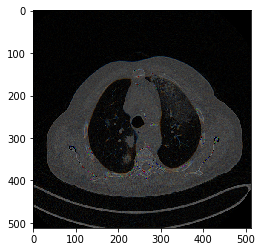

[[245.42633 243.40271 268.64108 275.28183]]
tensor([[211.8480, 290.7640, 243.5650, 327.9870]])


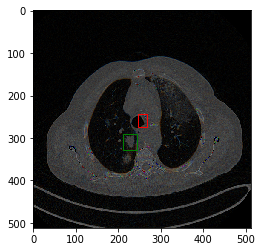

In [132]:
#img1 = plt.imread('/Users/aniruddha/Downloads/Test/000177_04_01_076.png')

print (dataset[i]['image'].shape)
img1_tensor = dataset[i]['image'].view(1,3,512,512)#torch.tensor(img1).view(1,3,512,512)


bbox_predicted,img_out_tensor = model(img1_tensor)

print (bbox_predicted.shape)
print (img_out_tensor.shape)

#img_out = img_out_tensor.view(3, 512, 512).permute(1,2,0).detach().numpy().astype(np.uint16)

img_out = dataset[i]['image'].permute(1,2,0).detach().numpy().astype(np.uint16)
# img_out = img_out_tensor.view(3, 512, 512).permute(1,2,0).detach().numpy().astype(np.uint16)

plt.imshow(img_out)
plt.show()

plt.imshow(img_out)
lesions = bbox_predicted[0].detach().numpy()
print (lesions)
#plt.gca().add_patch(plt.Rectangle((10, 15),500,500,linewidth=1,edgecolor='r', fill=False))

plt.gca().add_patch(plt.Rectangle((lesions[0][0],lesions[0][1]),
                                 lesions[0][2]-lesions[0][0],
                                 lesions[0][3]-lesions[0][1],
                                 linewidth=1,edgecolor='r', fill=False))

lesions = dataset[i]['lesions']
print (lesions)
plt.gca().add_patch(plt.Rectangle((lesions[0][0],lesions[0][1]),
                                 lesions[0][2]-lesions[0][0],
                                 lesions[0][3]-lesions[0][1],
                                 linewidth=1,edgecolor='g', fill=False))

#plt.savefig(open('/Users/aniruddha/Downloads/overlapping_lesion2.png', 'wb'))
plt.show()



In [131]:
i = 3
